#Machine Learning Models

##Import Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Read Data from CSV

In [19]:
#read certain data columns from cses4_cut.csv
dataset = np.array(pd.read_csv('cses4_cut.csv'))
X = dataset[:,1:-1]
N = len(X)

#read the labels column from csv
Y = np.array(pd.read_csv('cses4_cut.csv', usecols=['voted']))
print(X.shape)

## obtain the labels in the form of 1-hot encoding using sklearn
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=True)
X = encoder.fit_transform(X).toarray() 
Y = encoder.fit_transform(Y).toarray() 
print(X)

(12451, 31)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


##Feature Selecetion with Chi Square Method

In [20]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
test = SelectKBest(score_func=chi2, k=6)
fit = test.fit(X, Y)
X =test.fit_transform(X, Y)
fit.scores_


array([6.51767864e-02, 5.73532102e-02, 4.21599174e-01, 6.39689774e+00,
       2.38795629e+01, 3.02513762e+01, 1.49867003e+00, 9.69395369e-01,
       5.49438366e+01, 2.87787840e+01, 1.05642183e+00, 6.87697985e+00,
       2.00502890e+00, 1.40676884e+00, 1.20390785e+00, 1.42863226e+02,
       3.94960557e+00, 1.70247256e-04, 5.67917685e+02, 4.39885676e+00,
       1.46628559e+00, 2.48503513e+01, 2.80520492e+01, 1.41584169e+00,
       9.69847810e-01, 5.32813032e-02, 4.98083802e-01, 2.76844503e-01,
       1.24187797e+01, 1.64447136e-04, 5.22110905e-04, 5.77902797e+01,
       5.44274885e+00, 8.18568713e+01, 6.98168475e-01, 3.62377294e-01,
       6.43663819e+01, 6.26486419e+00, 8.05909442e+01, 3.91648739e+00,
       1.18761989e+00, 6.42684286e+01, 1.15444065e+01, 7.71813835e+01,
       3.91648739e+00, 8.49837033e-01, 6.43663819e+01, 3.49221538e+01,
       5.30563213e+00, 8.67740859e+00, 5.42072267e+00, 6.28394118e+01,
       4.88186054e+02, 8.78558445e+01, 4.72147578e+00, 1.30795021e+01,
      

##Dimensionality Reduction Using PCA

In [21]:
def reduce_dimentions(X):
  from sklearn.decomposition import PCA # 1. Choose the model class
  model = PCA(n_components=2) # 2. Instantiate the model with hyperparameters
  model.fit(X) # 3. Fit to data. Notice y is not specified!
  X = model.transform(X)
  return X


##Split Dataset

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=1)

# reduce dimensionality with PCA for train and test sets
X_train_r = reduce_dimentions(X_train)
X_test_r= reduce_dimentions(X_test)

##Plot Training Dataset

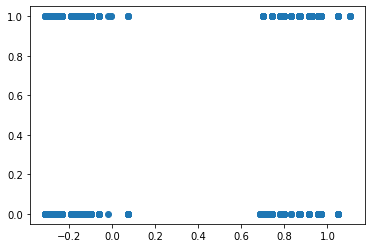

In [23]:
plt.scatter(X_train_r, Y_train)
plt.show()


##Gaussian Naive Bayes Classifier

In [24]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB() # 2. instantiate model
model.fit(X_train, Y_train[:, 1]) # 3. fit model to data
Y_model = model.predict(X_test)

##GaussianNB Accuracy Score


In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test[:,1], Y_model)
print(accuracy)

0.832597350461662


##Confusion Matrix for GaussianNB





In [26]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test[:,1], Y_model)
print("The Confusion Matrix for GaussianNB:\n", mat)

The Confusion Matrix for GaussianNB:
 [[ 103  361]
 [  56 1971]]


##KN Neighbors Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def tune_KNN(N, k_values):
  accuracies = []
  for k in k_values:
    # instantiate kNN with given neighbor size k
    knn = KNeighborsClassifier(n_neighbors=k)
    # run cross validation for a given kNN setup
    # I have setup n_jobs=-1 to use all cpus in my env.
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy', n_jobs=-1)
    accuracies.append(scores.mean())
  return accuracies


k_values = [i for i in range(1, 100)]
accuracies = tune_KNN(N, k_values)
print(accuracies)

model = KNeighborsClassifier(n_neighbors= np.argmax(accuracies))
model.fit(X_train, Y_train)
y_model = model.predict(X_test)
Score = accuracy_score(Y_test, y_model)
print(Score)







[0.7632530120481927, 0.717269076305221, 0.7634538152610443, 0.7273092369477913, 0.8286144578313254, 0.7966867469879517, 0.8420682730923694, 0.8362449799196788, 0.8420682730923694, 0.8329317269076306, 0.8417670682730923, 0.8360441767068274, 0.8418674698795181, 0.8376506024096386, 0.8424698795180723, 0.8407630522088352, 0.8426706827309236, 0.8402610441767069, 0.8412650602409638, 0.8401606425702812, 0.8416666666666668, 0.8389558232931726, 0.8413654618473896, 0.8400602409638556, 0.8416666666666668, 0.8405622489959839, 0.8413654618473896, 0.841164658634538, 0.841164658634538, 0.839859437751004, 0.8416666666666666, 0.8388554216867471, 0.8410642570281123, 0.8382530120481928, 0.8402610441767067, 0.8376506024096386, 0.8396586345381525, 0.836847389558233, 0.8401606425702811, 0.8355421686746988, 0.8402610441767069, 0.8371485943775101, 0.8400602409638556, 0.8340361445783133, 0.8390562248995984, 0.8331325301204819, 0.8390562248995984, 0.8343373493975903, 0.8385542168674698, 0.8335341365461847, 0.83

Text(0, 0.5, 'Cross-Validated Accuracy')

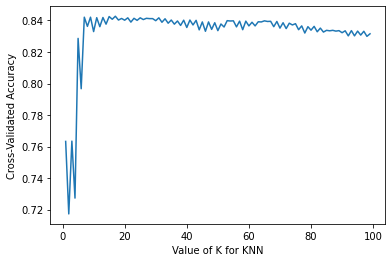

In [36]:
plt.plot(k_values, accuracies)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

##LogisticRegression Optimization by GridSearchCV





In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
param_grid = [
              {'penalty' : ['l1','l2', 'elasticnet'],
               'C' : np.logspace(-8,8,20),
               'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
               'max_iter' : [100,1000, 2500, 5000]
              }]

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, param_grid=param_grid, cv = 3, verbose=True, n_jobs=-1)
clf_best = clf.fit(X_train, Y_train[:,1])

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 2556 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:   29.3s finished


In [30]:
clf_best.best_estimator_

LogisticRegression(C=0.3792690190732246, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
best_score = clf_best.score(X_train, Y_train[:,1])
best_param = clf_best.best_params_

##Use of LogisticRegression 

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0, C=best_param.get('C'), penalty=best_param.get('penalty'), solver=best_param.get('solver'), max_iter=best_param.get('max_iter'))
model.fit(X_train, Y_train[:,1])
Y_model = model.predict(X_test) 
accuracy = accuracy_score(Y_test[:,1], Y_model)
print(accuracy)

0.8334002408671216
